In [1]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73026 sha256=602d7ff59e44324f9072b8b1508b66cdf7a7d2affddd388df3589732657a63f4
  Stored in directory: /root/.cache/pip/wheels/2e/27/39/f44e52756a6407b444143f233abe9fda0e18a23e8b20e0cd1c
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.2
    Uninstalling kaggle-1.7.4.2:
      Successfully uninstalled kaggle-1.7.4.2


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

In [3]:
!kaggle datasets download -d mozillaorg/common-voice -p /content/datasets --force

100% 12.0G/12.0G [01:14<00:00, 164MB/s]
100% 12.0G/12.0G [01:14<00:00, 174MB/s]


In [5]:
%cd datasets

/content/datasets


In [6]:
!unzip common-voice.zip

Streaming output truncated to the last 5000 lines.
  inflating: cv-valid-train/cv-valid-train/sample-190776.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190777.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190778.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190779.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190780.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190781.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190782.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190783.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190784.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190785.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190786.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190787.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190788.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190789.mp3  
  inflating: cv-valid-train/cv-valid-train/sample-190790.mp3  
  in

In [7]:
import pandas as pd

In [8]:
dev_df = pd.read_csv('cv-valid-dev.csv')
dev_df.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-dev/sample-000000.mp3,be careful with your prognostications said the...,1,0,NaN,NaN,NaN,NaN
1,cv-valid-dev/sample-000001.mp3,then why should they be surprised when they se...,2,0,NaN,NaN,NaN,NaN
2,cv-valid-dev/sample-000002.mp3,a young arab also loaded down with baggage ent...,2,0,NaN,NaN,NaN,NaN
3,cv-valid-dev/sample-000003.mp3,i thought that everything i owned would be des...,3,0,NaN,NaN,NaN,NaN
4,cv-valid-dev/sample-000004.mp3,he moved about invisible but everyone could he...,1,0,fourties,female,england,NaN


In [9]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   filename    4076 non-null   object 
 1   text        4076 non-null   object 
 2   up_votes    4076 non-null   int64  
 3   down_votes  4076 non-null   int64  
 4   age         1528 non-null   object 
 5   gender      1540 non-null   object 
 6   accent      1350 non-null   object 
 7   duration    0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 254.9+ KB


In [10]:
!pip install pydub

In [11]:
from IPython.display import Audio, display
import os

def display_audio(audio_path):
  display(Audio(audio_path))

audio_directory = 'cv-valid-dev/cv-valid-dev'
audio_files = [audio for audio in os.listdir(audio_directory)]

for audio_file in audio_files[:5]:
  audio_path = os.path.join(audio_directory, audio_file)
  display_audio(audio_path)


In [12]:
dev_df['down_votes'].value_counts()

,count
down_votes,
0,3652
1,363
2,40
3,10
4,4
12,2
15,2
6,1
21,1


In [13]:
dev_df[dev_df['down_votes'] == 0][:10]

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-dev/sample-000000.mp3,be careful with your prognostications said the...,1,0,NaN,NaN,NaN,NaN
1,cv-valid-dev/sample-000001.mp3,then why should they be surprised when they se...,2,0,NaN,NaN,NaN,NaN
2,cv-valid-dev/sample-000002.mp3,a young arab also loaded down with baggage ent...,2,0,NaN,NaN,NaN,NaN
3,cv-valid-dev/sample-000003.mp3,i thought that everything i owned would be des...,3,0,NaN,NaN,NaN,NaN
4,cv-valid-dev/sample-000004.mp3,he moved about invisible but everyone could he...,1,0,fourties,female,england,NaN
5,cv-valid-dev/sample-000005.mp3,but everything had changed,3,0,teens,male,us,NaN
6,cv-valid-dev/sample-000006.mp3,are you sure this is claire,2,0,NaN,NaN,NaN,NaN
7,cv-valid-dev/sample-000007.mp3,it had told him to dig where his tears fell,1,0,NaN,NaN,NaN,NaN
8,cv-valid-dev/sample-000008.mp3,the shop folks were taking down their shutters...,1,0,twenties,female,canada,NaN
9,cv-valid-dev/sample-000009.mp3,the teacher thought that he'd taught himself a...,1,0,fifties,female,australia,NaN


In [30]:
audio_path = os.path.join(audio_directory, "sample-000000.mp3")
display_audio(audio_path)

 => It seems that the difference between upvotes and downvotes doesn't relate to the quality of audios

**Preprocessing steps**



In [16]:
dev_df = dev_df.drop(columns=dev_df.columns[dev_df.columns.get_loc('up_votes') : dev_df.columns.get_loc('duration') + 1])

In [17]:
dev_df.head()

,filename,text
0,cv-valid-dev/sample-000000.mp3,be careful with your prognostications said the...
1,cv-valid-dev/sample-000001.mp3,then why should they be surprised when they se...
2,cv-valid-dev/sample-000002.mp3,a young arab also loaded down with baggage ent...
3,cv-valid-dev/sample-000003.mp3,i thought that everything i owned would be des...
4,cv-valid-dev/sample-000004.mp3,he moved about invisible but everyone could he...


In [28]:
import librosa
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')

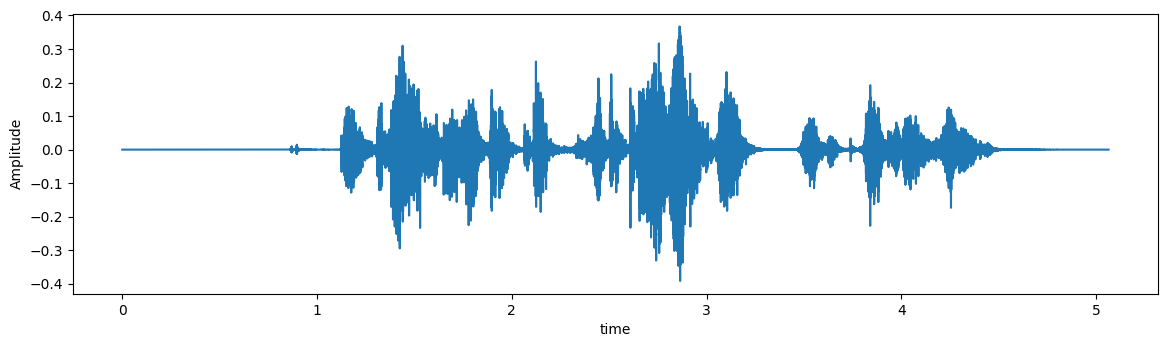

In [31]:
import librosa
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')

file_path = os.path.join(audio_directory, "sample-000000.mp3")
sample, sample_rate = librosa.load(file_path, sr=16000)

# Create the time array
time = np.linspace(0, len(sample) / sample_rate, num=len(sample))

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')

# Plot the audio waveform
ax1.plot(time, sample)
plt.show() # to display the plot